# Project Title: E-commerce User Behavior Segmentation


# Creator: Shireen Khan

# Domain: E-commerce

# Project Type: Customer Segmentation

# Data Source: UCI

# About the Dataset: It contains 8 columns and 541909 raws. It's a Online retail dataset.
Columns names are:

Invoice no. : *A unique identifier for each transaction or order.*

StockCode: *A unique identifier for each product or item sold.*

Discription: *Product detail*

Quantity: *The num. of sold Product*

Invoice Date

Unit Price: *Price of each product*

Customer ID

Country

# Objective:

To find hidden patterns in the data using EDA and advanced visualization and perform customer and product segmentation using Machine learning algorithms like KMeans and hierarchial clustering.


## ***1. Load the dataset***

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("/content/Online Retail.xlsx")

## ***2. EDA***

In [3]:
# Check the no. of columns and raws...
print(f'Raws no. in df: {df.shape[0]} (Five lakh fourty one thousand nine hundred nine)')
print(f'Columns no. in df: {df.shape[1]} (Eight)')

Raws no. in df: 541909 (Five lakh fourty one thousand nine hundred nine)
Columns no. in df: 8 (Eight)


In [4]:
# print the dataset...
df.sample(5)

InvoiceNo StockCode                         Description  Quantity  \
46010     540349     22609             PENS ASSORTED SPACEBALL        36   
64724     541660     22189             CREAM HEART CARD HOLDER         3   
19910     537915     22540          MINI JIGSAW CIRCUS PARADE         24   
107190    545416     21984    PACK OF 12 PINK PAISLEY TISSUES         24   
165704    550821     22328  ROUND SNACK BOXES SET OF 4 FRUITS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
46010  2011-01-06 14:07:00       0.21     15379.0  United Kingdom  
64724  2011-01-20 12:20:00       3.95     17787.0  United Kingdom  
19910  2010-12-09 10:55:00       0.42     12797.0        Portugal  
107190 2011-03-02 13:35:00       0.29     17770.0  United Kingdom  
165704 2011-04-21 08:54:00       2.95     12506.0          France

In [5]:
# Check the data types...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### ***Handling Duplicates...***

In [6]:
# Check the duplicates...
df.duplicated().sum()

np.int64(5268)

In [7]:
# Remove the duplicates...
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(536641, 8)

### ***Handling Null values***

In [9]:
# Check the Null values...
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

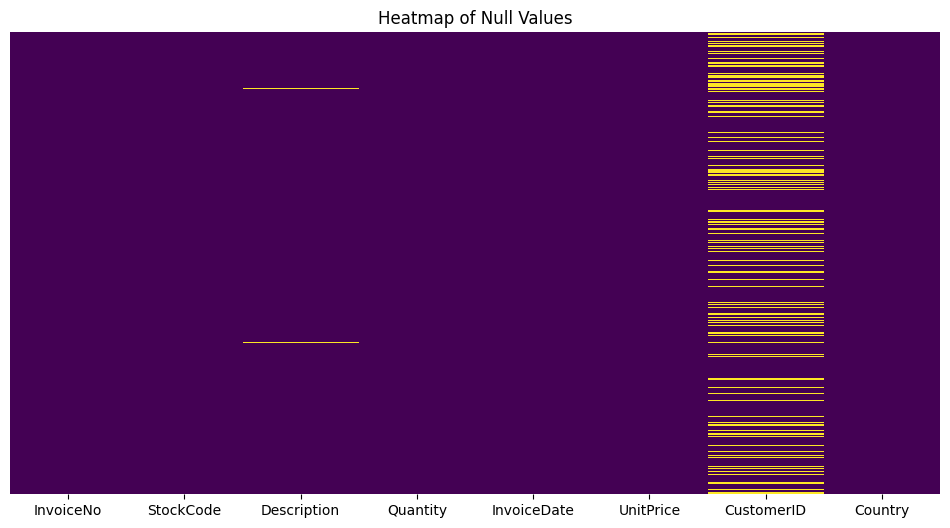

In [10]:
# Ploting the null values in df...
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Null Values')
plt.show()

In [11]:
# Handling null values...
# Can't fill the customer id according to our choise...so, Just remove it...
df.dropna(subset=["CustomerID"],inplace=True)

In [12]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
df.shape

(401604, 8)

### ***Handling errors and incorrect data types***

In [14]:
# Check the statistical summary of the df...
df.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  401604.000000                         401604  401604.000000   
mean       12.183273  2011-07-10 12:08:23.848567552       3.474064   
min    -80995.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-06 15:02:00       1.250000   
50%         5.000000            2011-07-29 15:40:00       1.950000   
75%        12.000000            2011-10-20 11:58:30       3.750000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       250.283037                            NaN      69.764035   

          CustomerID  
count  401604.000000  
mean    15281.160818  
min     12346.000000  
25%     13939.000000  
50%     15145.000000  
75%     16784.000000  
max     18287.000000  
std      1714.006089

In [15]:
df["Quantity"] = df['Quantity'].round(2)

In [16]:
# Removing negative quantity...
df = df[df["Quantity"] > 0]

#### ***Checking zero unit prices***

In [17]:
df["UnitPrice"] = df["UnitPrice"].round(2)

In [18]:
df.head(3)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom

In [19]:
zero_val = (df["UnitPrice"]==0).sum()
perc_zero = (df["UnitPrice"]==0).mean() * 100
print(f"Number of zeros in 'unit price' column: {zero_val}")
print(f"Percentage of zeroes in 'unit price' column {perc_zero.round(2)} ")

Number of zeros in 'unit price' column: 44
Percentage of zeroes in 'unit price' column 0.01 


In [20]:
# removing zero unit prices...
df= df[df["UnitPrice"] > 0]

In [21]:
df.shape

(392688, 8)

## ***Feature Engineering***

Revenue = Unit price * Quantity

In [22]:
# Create Revenue column...
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

Extract Month, Years etc. from the Invoice Date column...

Day of week contains...
0 = Monday

1 = Tuesday

2 = Wednesday

3 = Thursday

4 = Friday

5 = Saturday

6 = Sunday

In [23]:
df["Month"] = df["InvoiceDate"].dt.month
df["Year"] = df["InvoiceDate"].dt.year
df["Day_Of_Week"] = df["InvoiceDate"].dt.dayofweek

‘Customer_Purchase_Count’ that tells, for each row, how many unique purchases/transactions that CustomerID has made in the entire dataset.



In [24]:
df['Cust_Purchase_Count'] = df.groupby('CustomerID')['InvoiceNo'].transform('nunique')

Total revenue per invoice...

In [25]:
df["Reven_per_Invoice"] = df.groupby("InvoiceNo")['Revenue'].transform('sum')

Total revenue for each stockcode

In [26]:
df["Rev_per_stCode"] = df.groupby("StockCode")["Revenue"].transform('sum')

Seasons...from months

In [27]:
def seas(num):
  if num > 2 and num < 7:
    return "Summer"
  elif num > 6 and num < 10:
    return "Rainy"
  else:
    return "Winter"


In [28]:
# Apply the function on Month column...
df["Season"] = df["Month"].apply(seas)

## ***Bivariate and Multivariate analysis***

## **1.'Revenue per Stock code'**

In [29]:
fig = px.scatter(df, x= 'StockCode', y='Rev_per_stCode',
                 title='Revenue per Stock code',
                 color='StockCode')
fig.show()

## Conclusion:
Most of the products have Revenue under 10K.

Some products have High revenue like Stock code (22423) has revenue around 142K, Stock code(23843) has revenue around 168K. and So on...

## 2. 'Quantity by Month'

In [30]:
quant_month = df.groupby('Month')["Quantity"].sum().reset_index()
fig = px.bar(quant_month,
             x='Month',
             y='Quantity',
             title='Total Quantity by Month',
             color='Month',
             labels={'Quantity': 'Total Quantity', 'Month': 'Month'})

fig.show()

## Conclusion:

Highest quantity of sold products in 'November','October' and 'December'.



## 3. 'Total Revenue by Month'

In [31]:
reven_month = df.groupby('Month')["Revenue"].sum().reset_index()
fig = px.bar(reven_month,
             x='Month',
             y='Revenue',
             title='Total Revenue by Month',
             color='Month',
             labels={'Revenue': 'Total Revenue', 'Month': 'Month'})

fig.show()

## Conclusion:

The highest Revenue took place in 'October', 'November' and in'December' months around (1.1M).

## 4. 'Revenue by Year',

In [32]:
year_reven = df.groupby("Year")["Revenue"].sum().reset_index()
year_reven

Year     Revenue
0  2010   570422.73
1  2011  8316786.16

In [33]:
fig = px.bar(year_reven, x='Year', y='Revenue',
             title='Revenue by Year',
             color='Year')
fig.show()

## 5. 'Revenue by Season'

In [34]:
rev_season = df.groupby("Season")['Revenue'].sum().reset_index()
rev_season

Season     Revenue
0   Rainy  2193704.14
1  Summer  2399857.29
2  Winter  4293647.46

In [35]:
fig = px.pie(rev_season, names='Season', values='Revenue',
             title='Revenue by Seasons',
             color='Season')
fig.show()

## Conclusion:

The highest revenue is in Winter season (48.3% of Total),
Summer season(27% of total)Rainy Season(24.7% of total).

## 6. 'Total Customer purchase count by Country'

In [36]:
cust_pur_count = df.groupby("Country")["Cust_Purchase_Count"].sum().reset_index()

In [37]:
from matplotlib.markers import MarkerStyle
fig = px.line(cust_pur_count, x='Country', y='Cust_Purchase_Count',
              title='Total Customer purchase count by Country',
              markers=True,
              )
fig.update_traces(line=dict(color='hotpink'))
fig.show()

## Conclusion:

Highest number of customer purchase count is in UK (5.7M).

## 7. 'Revenue by Country'

In [38]:
count_reven_avg = df.groupby("Country")["Revenue"].mean().reset_index()


In [39]:
fig = fig = px.choropleth(count_reven_avg,
                    locations='Country',
                    locationmode='country names',
                    color='Revenue',
                    color_continuous_scale='Viridis',
                    title='Average Revenue  by Country',
                    labels={'Revenue':'Avg Revenue'}
                    )
fig.show()

In [40]:
top_count= count_reven_avg.sort_values(by='Revenue',ascending=False).head(10)
top_count

Country     Revenue
23  Netherlands  121.003111
0     Australia  117.234386
19        Japan  116.561900
29    Singapore   95.852658
31       Sweden   85.261844
9       Denmark   49.882474
21    Lithuania   47.458857
20      Lebanon   37.641778
10         EIRE   36.709446
4        Brazil   35.737500

## Conclusion:

Top countries by Revenue are Netherlands, Australia, Japan.

## 8. 'Revenue by Day of Week'

In [41]:
rev_week = df.groupby("Day_Of_Week")["Revenue"].mean().reset_index()

In [42]:
fig = px.treemap(rev_week,
                 path=['Day_Of_Week'],
                 values='Revenue',
                 color='Revenue',
                 color_continuous_scale='RdBu',
                 title='Average Revenue by Day of Week')
fig.show()

0 = Monday,
1 = Tuesday,
2 = Wednesday,
3 = Thursday,
4 = Friday,
5 = Saturday,
6 = Sunday

## Conclusion:

Most of the sales took place on 'Friday'.

The Lowest Revenue is on 'Sunday'.

## 9. 'Revenue Comparison'

In [43]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Prepare data
top_invoices = df[['InvoiceNo', 'Reven_per_Invoice']].sort_values('Reven_per_Invoice', ascending=False).head(10)
top_stock_codes = df[['StockCode', 'Rev_per_stCode']].sort_values('Rev_per_stCode', ascending=False).head(10)

fig = make_subplots(rows=1, cols=2, subplot_titles=("Top Revenue per Invoice", "Top Revenue per Stock Code"))

fig.add_trace(go.Bar(x=top_invoices['InvoiceNo'], y=top_invoices['Reven_per_Invoice'], name='Per Invoice'), row=1, col=1)
fig.add_trace(go.Bar(x=top_stock_codes['StockCode'], y=top_stock_codes['Rev_per_stCode'], name='Per Stock Code'), row=1, col=2)

fig.update_layout(title_text="Revenue Comparison")
fig.show()

## 10. 'Top 10 Customers by Revenue and Country'

In [44]:
top_customers = df.groupby(['CustomerID', 'Country'])['Revenue'].sum().reset_index()
top_customers = top_customers.sort_values(by='Revenue', ascending=False).head(10)

In [45]:
top_customers

CustomerID         Country    Revenue
1697     14646.0     Netherlands  280206.02
4209     18102.0  United Kingdom  259657.30
3736     17450.0  United Kingdom  194390.79
3016     16446.0  United Kingdom  168472.50
1887     14911.0            EIRE  143711.17
57       12415.0       Australia  124914.53
1341     14156.0            EIRE  117210.08
3779     17511.0  United Kingdom   91062.38
2710     16029.0  United Kingdom   80850.84
0        12346.0  United Kingdom   77183.60

In [46]:
fig = px.sunburst(top_customers, path=['Country','CustomerID'], values='Revenue',
                  color='Revenue',
                  title='Top 10 Customers by Revenue and Country')
fig.show()

## Conclusion:

Customer of Netherlands has High Revenue.

Most of the customers in Top 10 list belong to United Kingdom(UK).

# ***Model Building***

## **For Customer segmentation**

For customer segmentation we can use RFM analysis with clustering.

 snapshot (reference) date – typically the day after the latest transaction.

### RFM...

*   Recency: How recently a customer has made a purchase.
*   Frequency: How often a customer makes a purchase.(Total number of unique purchases)
*   Monetary: How much money a customer spends on purchases.



In [127]:
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

In [128]:
# rfm calculate...
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x:(snapshot_date - x.max()).days, # Recency
    'InvoiceNo' : 'nunique', # Frequency
    'Revenue' : 'sum' # Monetary
}).reset_index()

In [129]:
# Change the column names...
rfm.rename(columns={
    'InvoiceDate':'Recency',  # Rename 'InvoiceDate' into 'Recency'
    'InvoiceNo': 'Frequency', # Rename 'InvoiceNo' into 'Frequency'
    'Revenue':'Monetary'      # Rename 'Revenue' into 'Monetary'
},inplace=True)

In [130]:
rfm

CustomerID  Recency  Frequency  Monetary
0        12346.0      326          1  77183.60
1        12347.0        2          7   4310.00
2        12348.0       75          4   1797.24
3        12349.0       19          1   1757.55
4        12350.0      310          1    334.40
...          ...      ...        ...       ...
4333     18280.0      278          1    180.60
4334     18281.0      181          1     80.82
4335     18282.0        8          2    178.05
4336     18283.0        4         16   2045.53
4337     18287.0       43          3   1837.28

[4338 rows x 4 columns]

### ***Feature Scaling***

In [131]:
# import the libraries...
from sklearn.preprocessing import StandardScaler

# extract features...
rfm_feature = rfm[["Recency","Frequency","Monetary"]]

# Create an object of StandardScaler...
scale = StandardScaler()
# fit and transform...
feature_scaled = scale.fit_transform(rfm_feature)

In [132]:
feature_scaled

array([[ 2.33457414e+00, -4.25096503e-01,  8.36301037e+00],
       [-9.05340320e-01,  3.54416797e-01,  2.51698905e-01],
       [-1.75359593e-01, -3.53398530e-02, -2.79878268e-02],
       ...,
       [-8.45341904e-01, -2.95177619e-01, -2.08214334e-01],
       [-8.85340848e-01,  1.52368675e+00, -3.51515069e-04],
       [-4.95351144e-01, -1.65258736e-01, -2.35311111e-02]])

# ***1. K-Means clustering***

## *Find the Optimal K-value using...Elbow Method*

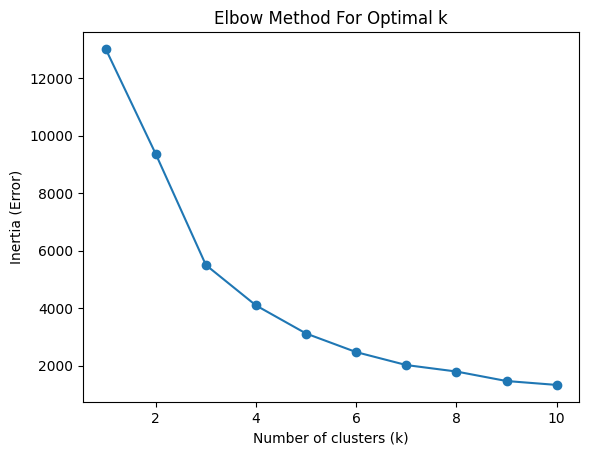

In [133]:
# import the libraries...
from sklearn.cluster import KMeans

# find the optimal k-value using Elbow method...
wcss=[]
for i in range(1,11):
  km = KMeans(n_clusters= i,random_state=42)
  km.fit_predict(feature_scaled)
  wcss.append(km.inertia_)

#plt.plot(range(1,11),wcss)
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Error)')
plt.title('Elbow Method For Optimal k')
plt.show()

We will see the Elbow point from where slope is becoming straight...

## *Using silhouette_score method...*




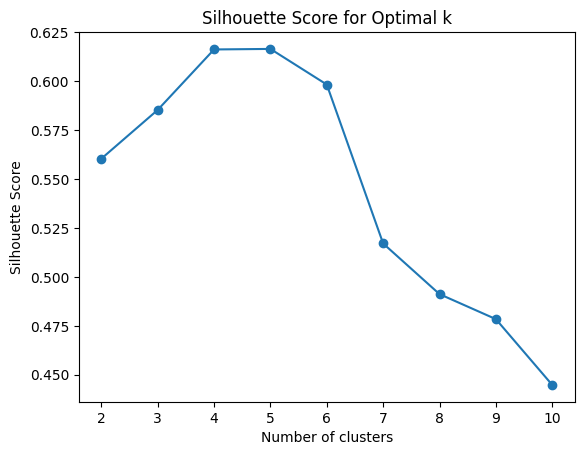

In [134]:
from sklearn.metrics import silhouette_score

# Example for Silhouette Score
sil_score = []
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    preds = model.fit_predict(feature_scaled)
    sil_score.append(silhouette_score(feature_scaled, preds))

plt.plot(range(2, 11), sil_score, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

* Choose the K-value with highest silhouette score.

* So we will take no. of clusters = 4


Now fit the K-means with optimal K value = 4

In [137]:
# Create an object of Kmean...
kmean = KMeans(n_clusters= 4, random_state=42) # Optimal K-value= 4
# fit on scaled data...
k_cluster = kmean.fit_predict(feature_scaled)


### Evaluate clustering using silhouette_score...

In [138]:
from sklearn.metrics import silhouette_score

print("KMeans Silhouette Score:", silhouette_score(feature_scaled, k_cluster))


KMeans Silhouette Score: 0.6162275299095438


Now take optimal k value = 2

In [140]:
kmean2 = KMeans(n_clusters= 2, random_state=42) # Optimal K-value= 2
# fit on scaled data...
k_cluster2 = kmean2.fit_predict(feature_scaled)

# Checking Silhouette scores...
print("KMeans Silhouette Score:", silhouette_score(feature_scaled, k_cluster2))

KMeans Silhouette Score: 0.5604013068323466


In [141]:
rfm["k_cluster"] = kmean.fit_predict(feature_scaled)

# Result:

On Optimal k value = 4 , Kmeans performs better on this data. We got the sil. score around 0.6

## ***Plotting the clusters..***

In [142]:
# Using 3D scatter plot...
fig = px.scatter_3d(rfm, x='Recency',
                    y='Frequency', z='Monetary',
                    color='k_cluster',
                    hover_data=['CustomerID','k_cluster'],
                    title='RFM clusters using KMeans')
fig.show()

# ***Using Hierarchial clustering...***

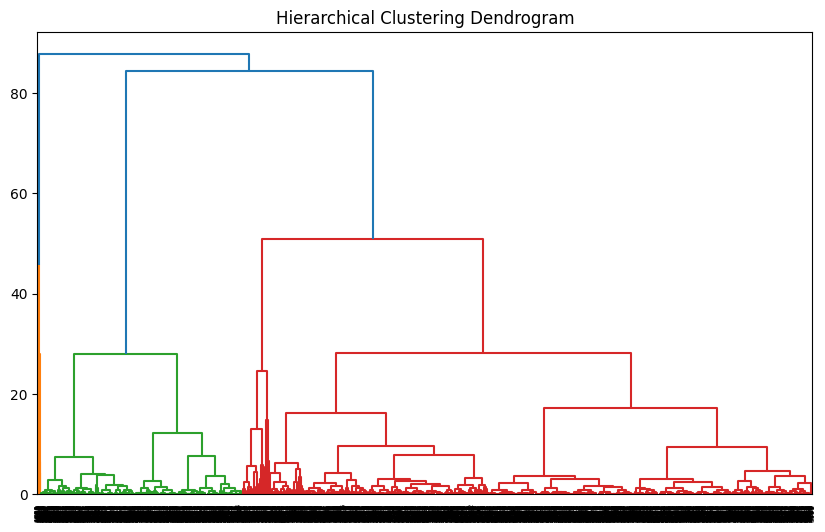

In [143]:
# import the libraries...
from scipy.cluster.hierarchy import linkage, dendrogram

# create an object of linkage...
link = linkage(feature_scaled,method='ward')
# plot Dendrogram...
plt.figure(figsize=(10,6))
dendrogram(link)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

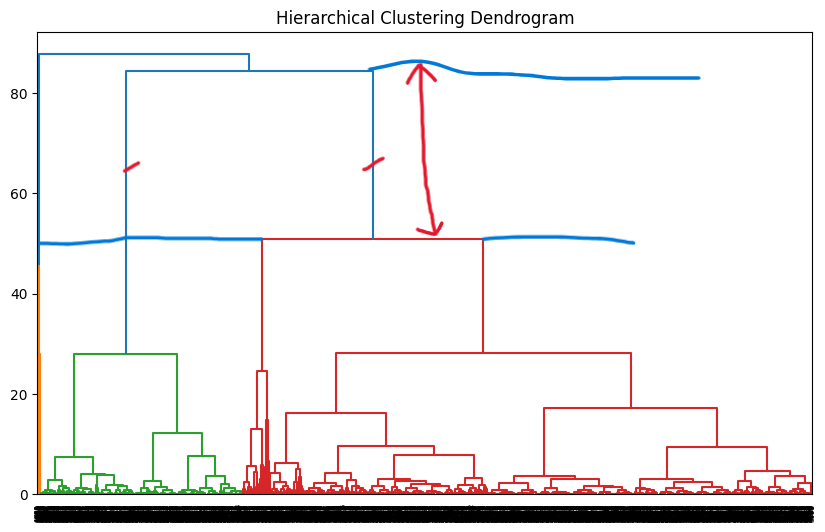

## Conclusion:

Wherever the horizotal lines cut the vertical lines, we have to look at the largest distance and the no. of vertcal lines in that distance will be our optimal no. of clusters = (2)

In [144]:
# now apply agglomerative clustering...
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters= 2, metric="euclidean", linkage='ward')

# fit and predict...
agg_clust = agg.fit_predict(feature_scaled)

In [145]:
rfm["Agglo_clusters"] = agg.fit_predict(feature_scaled)

In [147]:
print("Silhouette Score:", silhouette_score(feature_scaled, agg_clust))


Silhouette Score: 0.9199014069390521


## Result:

* Agglomerative clust. Silhouette Score (0.92) > kmean Silhouette Score(0.6)
* Agglomerative clust. is better then KMeans.

In [148]:
rfm

CustomerID  Recency  Frequency  Monetary  k_cluster  Agglo_clusters
0        12346.0      326          1  77183.60          3               0
1        12347.0        2          7   4310.00          0               0
2        12348.0       75          4   1797.24          0               0
3        12349.0       19          1   1757.55          0               0
4        12350.0      310          1    334.40          1               0
...          ...      ...        ...       ...        ...             ...
4333     18280.0      278          1    180.60          1               0
4334     18281.0      181          1     80.82          1               0
4335     18282.0        8          2    178.05          0               0
4336     18283.0        4         16   2045.53          3               0
4337     18287.0       43          3   1837.28          0               0

[4338 rows x 6 columns]

In [149]:
# Using 3D scatter plot...
fig = px.scatter_3d(rfm, x='Recency',
                    y='Frequency', z='Monetary',
                    color='Agglo_clusters',
                    hover_data=['CustomerID','Agglo_clusters'],
                    title='RFM clusters using agg clus.')
fig.show()

# End of the project

# Thankyou ♥